# Analysis and Visualization of globally Natural Disasters due to Climate Change 
### - The purpose of this notebook is to investigate and present what are the meaningful information in the dataset. Pyplot Library can be use for the purpose of making charts and graph to easily analyze the results.
### - The dataset used is Global Temperature, Climate Change and Natural Disasters, there are some relationships in between these indicators or World Data.

In [1]:
# Import the required libraries
import pandas as pd                  # Read Data
import matplotlib.pyplot as plt      # Plot Data 

# 1. Global Temperature

In [2]:
# Load the global temperature dataset
df = pd.read_csv('input/GlobalTemperatures.csv')
dataset = df.copy()
dataset.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


- From some of the data rows, it can be seen that there are only few features that are of our use to visualize and extract import information from that. So, better to just choose those Column from the dataset. There is the data of date(YYYY-MM-DD), Value of average of temperature and the uncertainty in that. So Data Preprocessing is the first step here.

## Data Preprocessing

In [3]:
# Choose the column of date and Temperature.
dataset = dataset[['dt', 'LandAndOceanAverageTemperature']]

# Save the date as an Year. 
dataset['dt'] = pd.to_datetime(dataset['dt'])
dataset.set_index('dt', inplace = True)

# Sort the column with respect to Year
dataset.sort_index(axis = 0)


,LandAndOceanAverageTemperature
dt,
1750-01-01,NaN
1750-02-01,NaN
1750-03-01,NaN
1750-04-01,NaN
1750-05-01,NaN
...,...
2015-08-01,17.589
2015-09-01,17.049
2015-10-01,16.290


In [4]:
"""
Here, for the preprocessing step - Annually resample of the data is being done, first of all the
Average value of temperature correponding for the Year. 
"""

dataset = dataset.resample('A').mean()
dataset.rename(columns = {'LandAndOceanAverageTemperature': 'AverageTemp'}, inplace = True)
dataset.index.rename('Year')
dataset.index = dataset.index.year

- The dataset have a lot of Null values so better to drop those but First we will see which Years against, there are the missing values of the Average Temperature. 
- The First Years data is missing, so we have drop those rows and start the visualization of the average temperature from Year 1850 onwards

In [5]:
print(dataset.isnull().sum())
print(dataset[dataset['AverageTemp'].isnull()].index)

AverageTemp    100
dtype: int64
Int64Index([1750, 1751, 1752, 1753, 1754, 1755, 1756, 1757, 1758, 1759, 1760,
            1761, 1762, 1763, 1764, 1765, 1766, 1767, 1768, 1769, 1770, 1771,
            1772, 1773, 1774, 1775, 1776, 1777, 1778, 1779, 1780, 1781, 1782,
            1783, 1784, 1785, 1786, 1787, 1788, 1789, 1790, 1791, 1792, 1793,
            1794, 1795, 1796, 1797, 1798, 1799, 1800, 1801, 1802, 1803, 1804,
            1805, 1806, 1807, 1808, 1809, 1810, 1811, 1812, 1813, 1814, 1815,
            1816, 1817, 1818, 1819, 1820, 1821, 1822, 1823, 1824, 1825, 1826,
            1827, 1828, 1829, 1830, 1831, 1832, 1833, 1834, 1835, 1836, 1837,
            1838, 1839, 1840, 1841, 1842, 1843, 1844, 1845, 1846, 1847, 1848,
            1849],
           dtype='int64', name='dt')


In [6]:
dataset.dropna(inplace = True)
print(dataset.isnull().sum())   # Verify, if they still have some null/NaN values

AverageTemp    0
dtype: int64


- There is a concept of Temperature Anomaly in the Climate Studies, which is Accurately measurement of Temperature values than its absolute measurement. Acurately measurement of the temperature is the comparison of the baseline temperature which is actually the avaerge/mean; with the all other values so see How much cooler or warmer the temperature is with the Normal ones. 


- We will save the difference of the temperature value with the baseline in a separate column and see what is the trend.

In [7]:
# Calculate the average value of global temperature as a baseline 
ref = dataset.loc['1951':'1980'].mean()['AverageTemp'] 

# Create the temperature anomaly column
dataset['Temperature Uncertainity'] = dataset['AverageTemp'] - ref
dataset.drop(['AverageTemp'], axis = 1)

dataset.head()

,AverageTemp,Temperature Uncertainity
dt,,
1850,14.867167,-0.432381
1851,14.991833,-0.307714
1852,15.006500,-0.293047
1853,14.955167,-0.344381
1854,14.991000,-0.308547


## Visualization 1: Temperature Uncertainity Rising over years
- A line plot is a good option for temperature over year charts because it can effectively show the trend of temperature change over time, handle multiple data series, and allow viewers to compare and draw conclusions about patterns and relationships in the data. It is a common and effective way to present this type of data in scientific and engineering contexts.

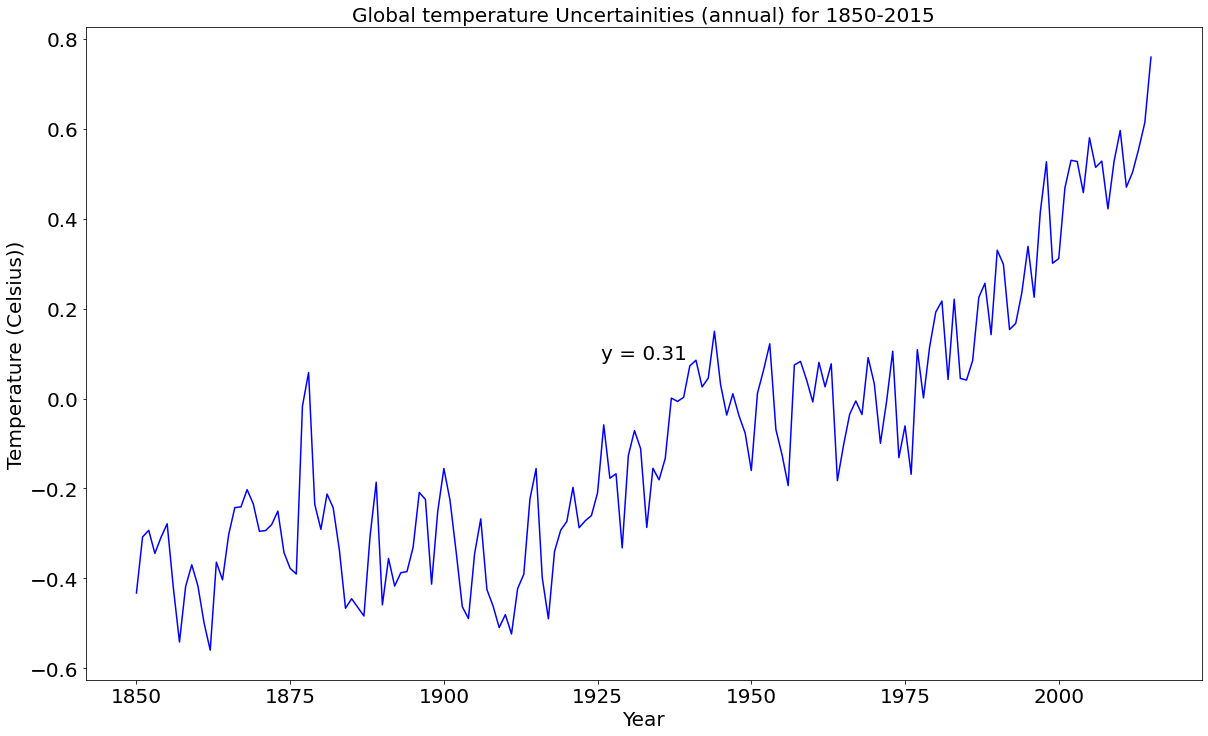

In [8]:
def plot_line_chart(dataframe):
    """
    This function will plot the line chart of the Temperature Uncertainity and display all the 
    relevant information. 

    Parameters:
    -----------
    dataframe: pandas DataFrame
        The data to be plotted.

    Returns:
    --------
    None
    """
    color = 'blue'
    fontsize = 20
    title = 'Global temperature Uncertainities (annual) for 1850-2015'
    xlabel = 'Year'
    ylabel = 'Temperature (Celsius))'
    figsize = (20, 12)
    linewidth = 3

    plt.figure(figsize=figsize)
    plt.plot(dataframe, color=color)
    plt.xlabel(xlabel, fontsize=fontsize)
    plt.ylabel(ylabel, fontsize=fontsize)
    plt.xticks(fontsize=fontsize)
    plt.yticks(fontsize=fontsize)
    plt.title(title, fontsize=fontsize)
    plt.text(0.5, 0.5, f"y = {dataframe.iloc[150]:.2f}", fontsize=fontsize,
             ha='center', va='center', transform=plt.gca().transAxes)
    plt.show()
    
# call the function with the dataframe
plot_line_chart(dataset['Temperature Uncertainity'])

- This Line Chart is showing us the trend of continuously increasing uncertainty. For example, the chart is showing the difference of the temperature with the baseline and it is increasing which means the temperature is continuously rising from the normal baseline temperature and no doubt the temperature of Earth is Rising which is offcourse alarming.


- After 1930, the temperature Uncertainty can be seen from this chart.

# 2. Natural disasters
- Now, we can see the disasters data and how often we are experiencing the natural disasters in the past

In [9]:
# Load the natural disaster dataset
disaster_dataset = pd.read_csv('input/number-of-natural-disaster-events.csv')
disaster = disaster_dataset.copy()
disaster.head()

,Entity,Code,Year,Number of reported natural disasters (reported disasters)
0,All natural disasters,NaN,1900,5
1,All natural disasters,NaN,1901,2
2,All natural disasters,NaN,1902,9
3,All natural disasters,NaN,1903,8
4,All natural disasters,NaN,1904,2


In [10]:
# Remove the 'Code' column
disaster.drop(['Code'], axis = 1)

# Check the different types of 'Entity' values
disaster['Entity'].unique()

array(['All natural disasters', 'Drought', 'Earthquake',
       'Extreme temperature', 'Extreme weather', 'Flood', 'Impact',
       'Landslide', 'Mass movement (dry)', 'Volcanic activity',
       'Wildfire'], dtype=object)

In [11]:
# Pivot the dataframe
disaster = disaster.pivot(index = 'Year', columns = 'Entity', values = 'Number of reported natural disasters (reported disasters)')
disaster.head()

Entity,All natural disasters,Drought,Earthquake,Extreme temperature,Extreme weather,Flood,Impact,Landslide,Mass movement (dry),Volcanic activity,Wildfire
Year,,,,,,,,,,,
1900,5.0,2.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN
1901,2.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1902,9.0,NaN,3.0,NaN,1.0,NaN,NaN,NaN,NaN,5.0,NaN
1903,8.0,1.0,1.0,NaN,2.0,2.0,NaN,NaN,1.0,1.0,NaN
1904,2.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN


- There are different types of the natural disaster, Better if we use the Pivot Table property to differentiate the statistics of all the Natural Disasters types separtely.


- There are many NaN values seen in the dataset , so we are replacing those with Zero which means there is no disaster in that time period.

In [12]:
# Remove the 'Impact' column
disaster.drop(['Impact'], axis = 1)

# Handle missing values and rename columns
disaster.fillna(value = 0, inplace = True)
disaster.head()

Entity,All natural disasters,Drought,Earthquake,Extreme temperature,Extreme weather,Flood,Impact,Landslide,Mass movement (dry),Volcanic activity,Wildfire
Year,,,,,,,,,,,
1900,5.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1901,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1902,9.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,5.0,0.0
1903,8.0,1.0,1.0,0.0,2.0,2.0,0.0,0.0,1.0,1.0,0.0
1904,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


## Visualization 2: Increasing trend of Natural Disasters over years
- A horizontal stacked bar chart is a good option for this chart because it allows us to compare the relative frequencies of different types of natural disasters over time. The horizontal orientation makes it easy to see the trends and changes in the data over time, while the stacked bars allow us to see the contribution of each type of natural disaster to the total count for each year. The stacked bars also make it easy to compare the relative frequencies of different types of natural disasters for each year.

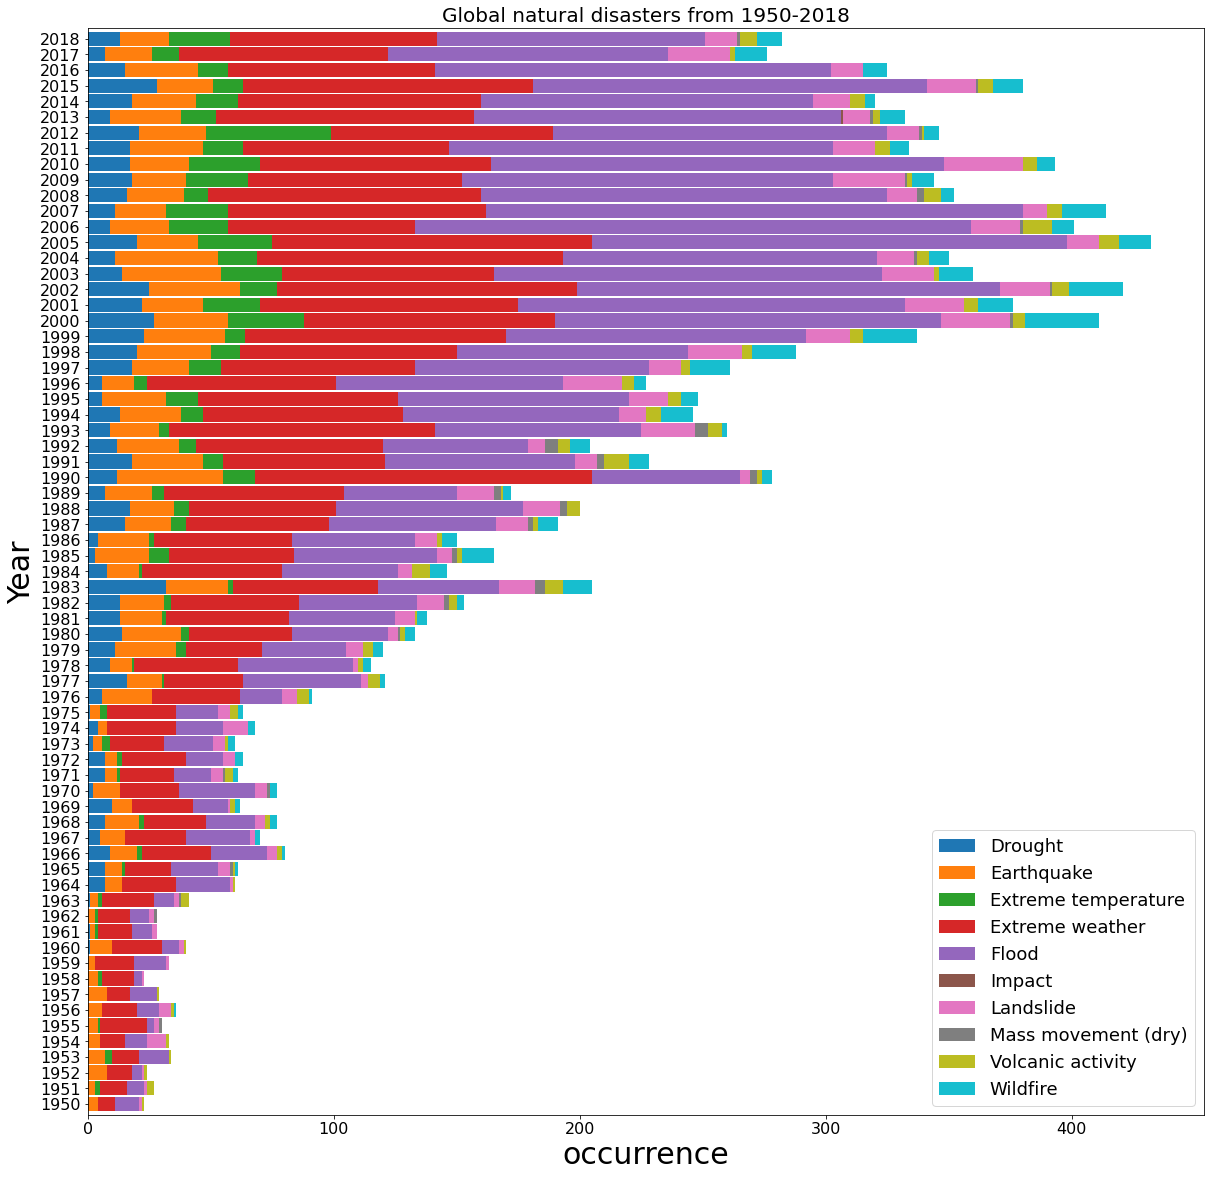

In [14]:
def plot_natural_disasters(df):
    """
       This function takes a pandas DataFrame as an argument,
       and plots a horizontal stacked bar chart for the types of natural disasters occurrences
       for 1950-2018 using the provided code. 
       The x-axis represents the years, and the y-axis represents the types of natural disasters.
       The stacked bars show the relative frequency of each type of natural disaster over time.
    Parameters:
    -----------
    df: pandas DataFrame
        The data to be plotted.

    Returns:
    --------
    None
    """
    df.drop(['All natural disasters'], axis=1).loc[1950:].plot.barh(
        stacked=True, width=0.9, figsize=(20, 20))

    plt.title('Global natural disasters from 1950-2018', fontsize=20)
    plt.ylabel('Year', fontsize=30)
    plt.yticks(fontsize=16)
    plt.xlabel('occurrence', fontsize=30)
    plt.xticks(fontsize=16)
    plt.legend(loc=4, prop={'size': 18})

    plt.show()
    
    
# call the function with the dataframe
plot_natural_disasters(disaster)

- The above bar plot, which has unique stacks for each category of natural disasters, shows that 
     - The frequency of floods has increased significantly over the years in comparison to other disasters. 
     - Extreme weather is the second most common disaster, followed by earthquakes. 
     - The plot also indicates that the total number of natural disasters has been consistently increasing globally. 
     
     
This is further highlighted by the plot below, which shows a clear upward trend in the frequency of natural disasters from 1950 to 2018. These charts provide a visual representation of the trends and patterns in natural disasters, allowing for easy comparison and analysis of the data. They underscore the importance of disaster preparedness and management in mitigating the impact of these catastrophic events on communities around the world.

# Visualization 3: Relationship between Disasters and Temperature Uncertainity 

- A line plot is a good option for this chart because it shows the trend of both variables over time, which is the main focus of the comparison. By plotting both the temperature anomaly and the occurrence of natural disasters on the same graph with two different y-axes, we can easily see any correlation or relationship between these two variables. A line plot allows us to easily observe any long-term trends or patterns in the data, which can be difficult to see in other types of plots. Additionally, a line plot allows us to see any fluctuations or variations in the data over time. This is especially useful for studying the impact of natural disasters on global temperature patterns and understanding how these variables are changing over time. Overall, a line plot is an effective way to visualize the relationship between two variables that are changing over time. 

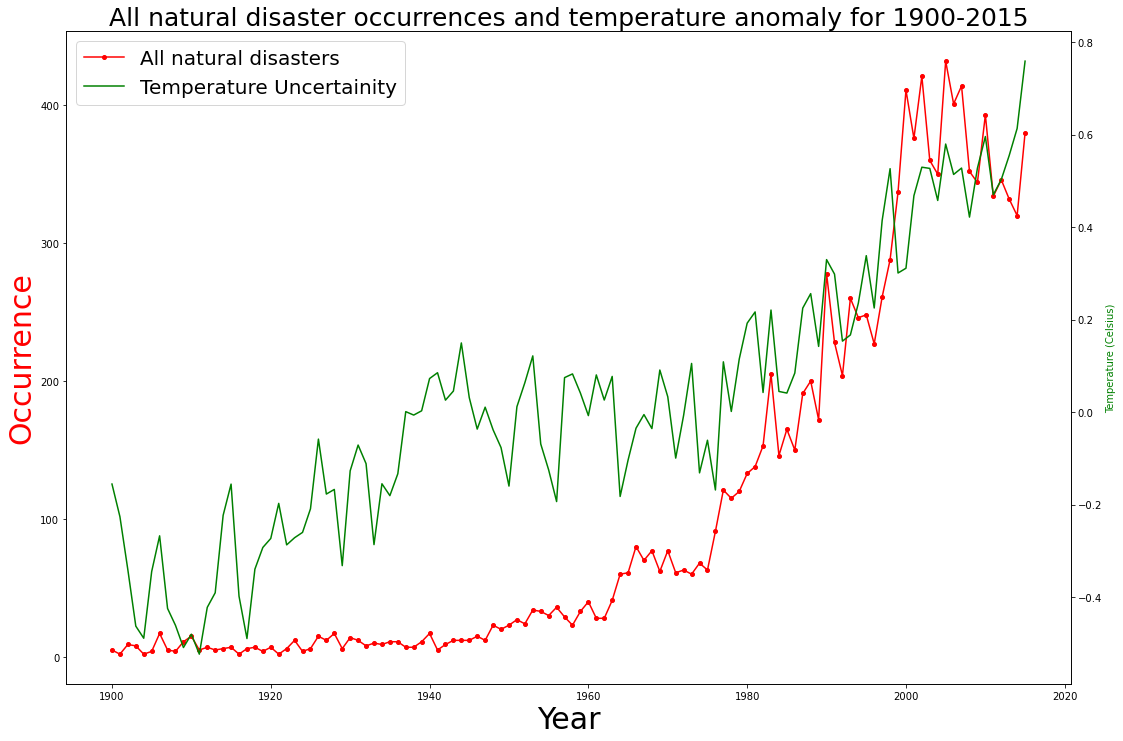

In [16]:
def plot_disasters_temp(df, disaster):
    """
    This will generate a plot that shows the comparison between the occurrence of all natural
    disasters and temperature anomaly for the period of 1900-2015. The plot has two y-axes,
    with the left y-axis representing the occurrence of natural disasters and the right y-axis
    representing the temperature anomaly. This plot provides a visual representation of the
    correlation between these two variables over time.

    Parameters:
    -----------
    df : pandas DataFrame
        The dataframe containing the temperature uncertainty data.

    disaster : pandas DataFrame
        The dataframe containing the natural disasters data.

    Returns:
    --------
    None
    """
    fig, ax = plt.subplots(figsize = (18, 12))
    ax2 = ax.twinx()

    line1 = ax.plot(disaster.loc[:2015, 'All natural disasters'], '-ro', markersize = 4, label = 'All natural disasters')
    line2 = ax2.plot(dataset.loc[1900:, 'Temperature Uncertainity'], 'g-', label = 'Temperature Uncertainity')

    lines = line1 + line2
    labels = [l.get_label() for l in lines]

    plt.title('All natural disaster occurrences and temperature anomaly for 1900-2015', fontsize = 25)
    ax.set_xlabel('Year', fontsize = 30)
    ax.set_ylabel('Occurrence', color = 'r', fontsize = 30)
    ax2.set_ylabel('Temperature (Celsius)', color = 'g')
    ax.legend(lines, labels, loc = 0, prop = {'size': 20})

    plt.show()


plot_disasters_temp(dataset, disaster)

- Global natural disasters have been increasing over time, with a sharp rise observed after 1940. This trend coincides with a rise in temperatures, which began to exceed the historical average around the same time. This suggests that there may be a correlation between natural disasters and global temperature patterns. Understanding this relationship is important for predicting future natural disasters and preparing for their impact.

# 3. Economic Damage
- Now, we can see the disasters data and how often we are experiencing the natural disasters in the past

In [17]:
# Load the economic damage dataset
economical_dataset = pd.read_csv('input/economic-damage-from-natural-disasters.csv')
economical = economical_dataset.copy()

economical.head()

,Entity,Code,Year,Total economic damage from natural disasters (US$)
0,All natural disasters,NaN,1900,30000000
1,All natural disasters,NaN,1901,0
2,All natural disasters,NaN,1902,0
3,All natural disasters,NaN,1903,480000000
4,All natural disasters,NaN,1904,0


- Remove the irrelevant columns, rename the other columns and handle the missing values.

In [18]:
# Remove the 'Code' column
economical.drop(['Code'], axis = 1, inplace = True)

# Pivot the dataframe
economical = economical.pivot(index = 'Year', columns = 'Entity', values = 'Total economic damage from natural disasters (US$)')

economical.drop(['Impact'], axis = 1, inplace = True)

economical.fillna(value = 0, inplace = True)

economical.head()

Entity,All natural disasters,Drought,Earthquake,Extreme temperature,Extreme weather,Flood,Landslide,Mass movement (dry),Volcanic activity,Wildfire
Year,,,,,,,,,,
1900,30000000.0,0.0,0.0,0.0,30000000.0,0.0,0.0,0.0,0.0,0.0
1901,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1902,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1903,480000000.0,0.0,0.0,0.0,0.0,480000000.0,0.0,0.0,0.0,0.0
1904,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Visualization 3: Relationship between Disasters and Economy Effected

- A stacked horizontal bar chart is a good option for representing economic damage by type of natural disaster over time as it allows for easy comparison of the contribution of each disaster type to the overall economic loss. Additionally, it helps to identify the trend of economic damage caused by each disaster type.

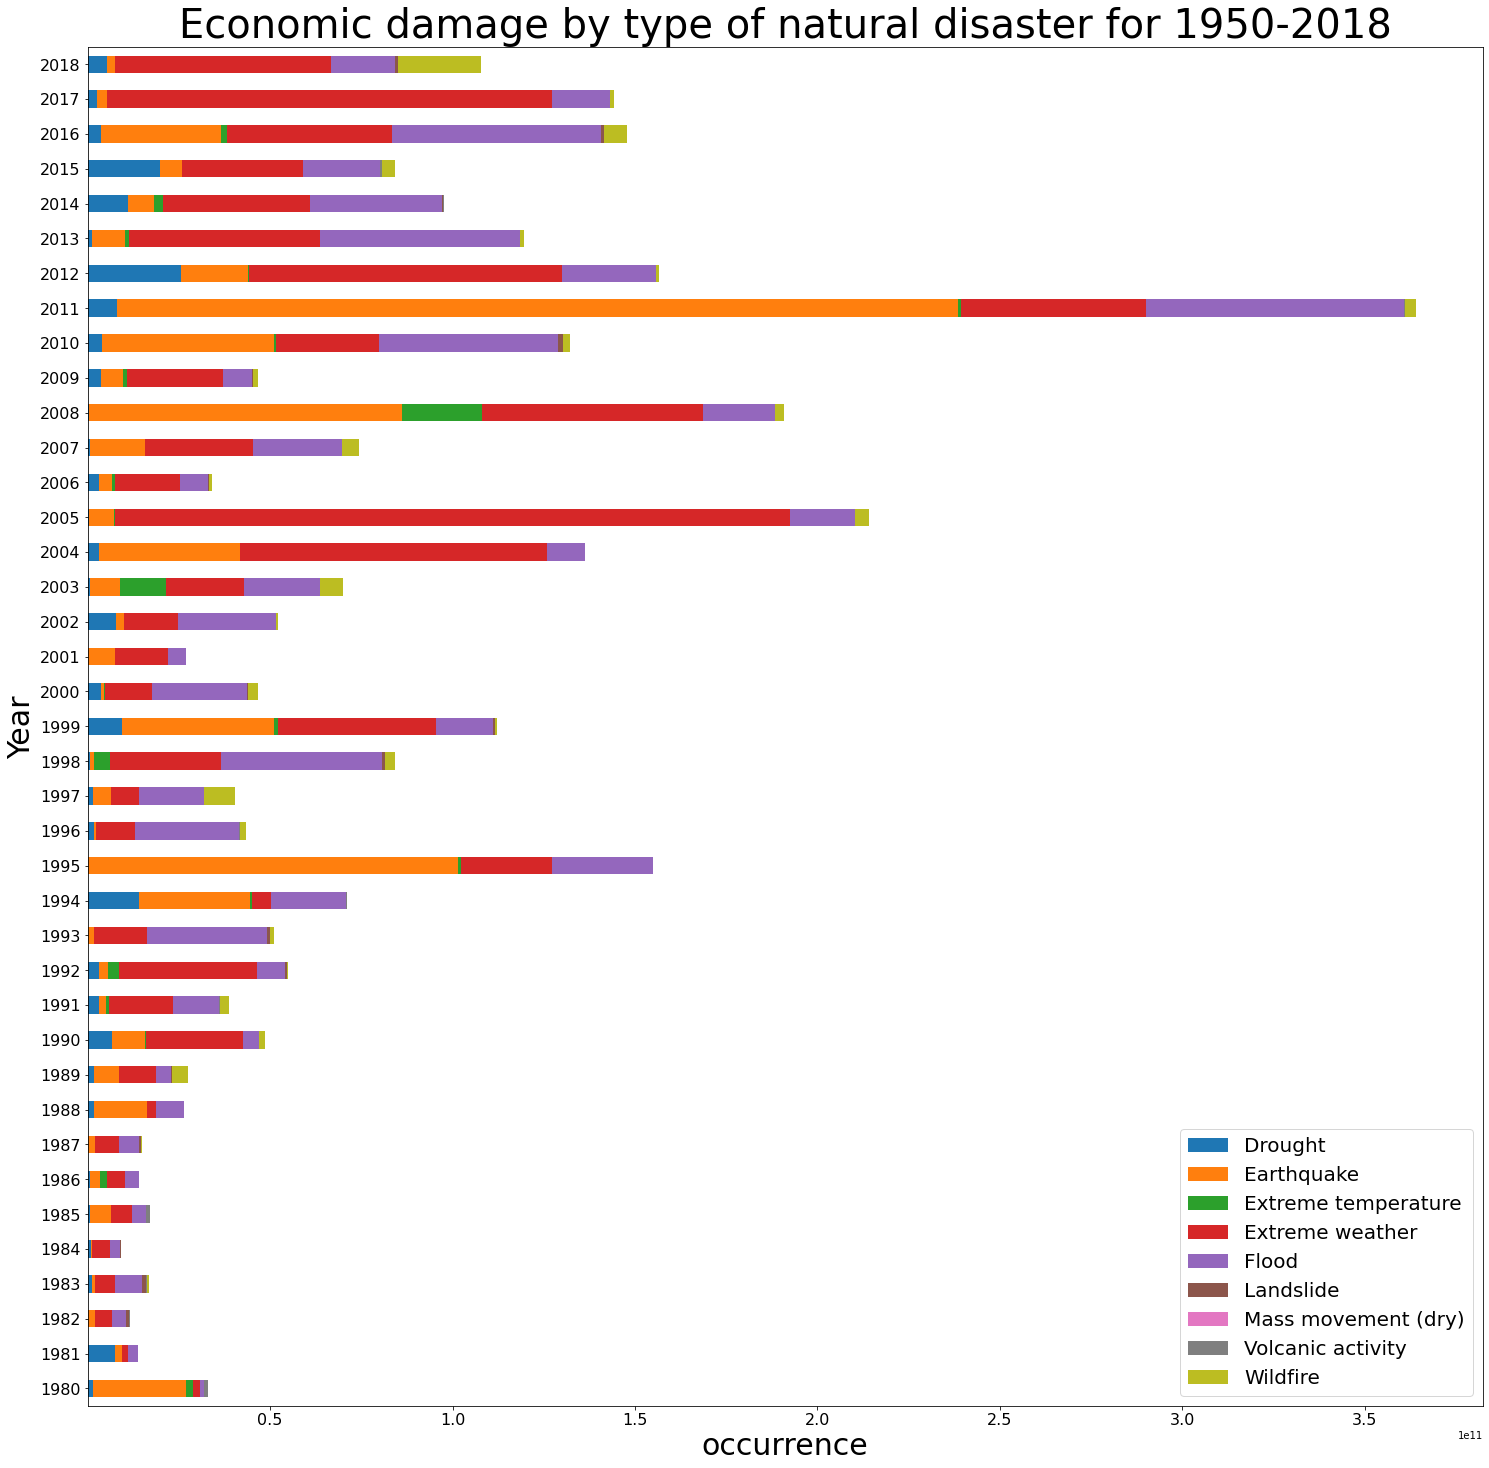

In [20]:
def plot_economic_damage(df):
    '''
    The function takes a dataframe df as an argument and plots the economic damage categorized
    by the type of natural disasters from 1950 to 2018. It uses a stacked horizontal bar chart
    to visualize the data. The function also sets the title and labels for the chart,
    and displays the legend. Additionally, it displays only the maximum five values on the chart
    for better visualization.
    
    Parameters:
    df (pandas.DataFrame): The dataframe containing the data to be plotted.
    
    Returns:
    None
    '''
    df.drop(['All natural disasters'], axis=1).loc[1980:].plot.barh(stacked=True, figsize=(25, 25))

    plt.title('Economic damage by type of natural disaster for 1950-2018', fontsize=40)
    plt.ylabel('Year', fontsize=30)
    plt.yticks(fontsize=16)
    plt.xlabel('occurrence', fontsize=30)
    plt.xticks(fontsize=16)
    
    plt.legend(loc=4, prop={'size': 20})

    # Display maximum five values on the chart
    ax = plt.gca()
    plt.show()
    

plot_economic_damage(economical)

- The economic damage caused by natural disasters is influenced by various factors such as the type of catastrophe, its location, intensity, management activities, etc. Here are some key observations from the plot:



    - The overall economic loss from natural disasters has been increasing over time.
    - The increase in natural disasters, which is linked to global temperature rise, is the major contributor to this trend. However, not all disasters have the same impact on economic damage.
    - Economic development, which leads to greater infrastructure and land productivity, may also be a contributing factor to the increase in economic harm caused by natural disasters.
    
    
In conclusion, the plot highlights the increasing economic damage caused by natural disasters and the need for effective disaster management strategies to minimize their impact.

# References of Dataset
-  The source of the global temperature data is the Kaggle dataset https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data by Berkeley Earth.
-  Natural diasaster data is taken from https://ourworldindata.org/natural-disasters (data published by EMDAT (2019): OFDA/CRED International Disaster Database, Université catholique de Louvain – Brussels – Belgium)